# IMPORTS

In [43]:
import pandas as pd
import xml.etree.ElementTree as xet
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg


In [5]:
df_copy = pd.read_csv('labels.csv')
df_copy.head()
df = df_copy.head(10)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,kaggle_dataset001/images\N1.xml,1093,1396,645,727
1,kaggle_dataset001/images\N100.xml,134,301,312,350
2,kaggle_dataset001/images\N101.xml,31,139,128,161
3,kaggle_dataset001/images\N102.xml,164,316,216,243
4,kaggle_dataset001/images\N103.xml,813,1067,665,724


Parse the data

In [6]:
def parsing(path):
    parser = xet.parse(path).getroot()
    name = parser.find('filename').text
    filename = f'kaggle_dataset001/images/{name}'
    return filename
df[['filename']] = df['filepath'].apply(parsing).apply(pd.Series)
df = df.drop('filepath', axis=1)
df.head()

C:\Users\macie\AppData\Local\Temp\ipykernel_11288\479357412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['filename']] = df['filepath'].apply(parsing).apply(pd.Series)


,xmin,xmax,ymin,ymax,filename
0,1093,1396,645,727,kaggle_dataset001/images/N1.jpeg
1,134,301,312,350,kaggle_dataset001/images/N100.jpeg
2,31,139,128,161,kaggle_dataset001/images/N101.jpeg
3,164,316,216,243,kaggle_dataset001/images/N102.jpeg
4,813,1067,665,724,kaggle_dataset001/images/N103.jpeg


In [7]:
tree = xet.parse("my_hq_photos/annotations.xml")
root = tree.getroot()

    # Initialize an empty list to store the data
data = []

    # Iterate over the 'image' elements in the XML data
for image in root.findall('image'):
    # Extract the 'name' attribute and prepend it with the directory path
    filename = "my_hq_photos/" + image.get('name')

        # Find the 'box' element and extract the 'xtl', 'ytl', 'xbr', 'ybr' attributes
    box = image.find('box')
    xmin = float(box.get('xtl'))
    ymin = float(box.get('ytl'))
    xmax = float(box.get('xbr'))
    ymax = float(box.get('ybr'))

        # Append the extracted data to the list as a dictionary
    data.append({'filename': filename, 'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax})

    # Convert the list of dictionaries to a DataFrame
my_df = pd.DataFrame(data)

In [8]:
my_df.head()

,filename,xmin,ymin,xmax,ymax
0,my_hq_photos/licence001.jpg,1420.25,1707.80,2483.40,1966.48
1,my_hq_photos/licence002.jpg,1755.73,1637.37,2756.54,1941.51
2,my_hq_photos/licence003.jpg,1115.41,1973.85,1474.34,2091.94
3,my_hq_photos/licence004.jpg,1245.69,1564.47,1543.40,1650.17
4,my_hq_photos/licence005.jpg,696.85,2504.09,1474.76,2804.36


In [9]:
joined_df = pd.concat([df, my_df], ignore_index=True)

In [15]:
joined_df.head(15)

,xmin,xmax,ymin,ymax,filename
0,1093.00,1396.00,645.00,727.00,kaggle_dataset001/images/N1.jpeg
1,134.00,301.00,312.00,350.00,kaggle_dataset001/images/N100.jpeg
2,31.00,139.00,128.00,161.00,kaggle_dataset001/images/N101.jpeg
3,164.00,316.00,216.00,243.00,kaggle_dataset001/images/N102.jpeg
4,813.00,1067.00,665.00,724.00,kaggle_dataset001/images/N103.jpeg
5,66.00,154.00,166.00,197.00,kaggle_dataset001/images/N104.jpeg
6,360.00,434.00,174.00,195.00,kaggle_dataset001/images/N105.jpeg
7,137.00,262.00,249.00,290.00,kaggle_dataset001/images/N106.jpeg
8,207.00,356.00,174.00,287.00,kaggle_dataset001/images/N107.jpeg
9,184.00,342.00,220.00,257.00,kaggle_dataset001/images/N108.jpeg


# CHECK PREDICTIONS with IOU

## YOLOv8

In [17]:
model = YOLO('runs/detect/train9/weights/best.onnx')  # load model

In [57]:
results = model('my_hq_photos/licence003.jpg')  # perform inference

image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\my_hq_photos\licence003.jpg: 640x640 1 license_plate, 52.7ms
Speed: 5.0ms preprocess, 52.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [58]:
results[0].show()  # display results

In [51]:
row_index = 12
path = joined_df['filename'][row_index]
print(path)
results = model(path)  # perform inference
cords = results[0].boxes[0].xyxy.tolist()
x1, y1, x2, y2 = cords[0]
cords = tuple(cords[0])
columns_to_extract = ['xmin', 'ymin', 'xmax', 'ymax']
cords2 = tuple(joined_df.loc[row_index, columns_to_extract])
print(cords)
print(cords2)

my_hq_photos/licence003.jpg
image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\my_hq_photos\licence003.jpg: 640x640 1 license_plate, 105.7ms
Speed: 5.1ms preprocess, 105.7ms inference, 33.6ms postprocess per image at shape (1, 3, 640, 640)
(1141.2294921875, 1976.6124267578125, 1465.220947265625, 2090.819580078125)
(1115.41, 1973.85, 1474.34, 2091.94)


### display image

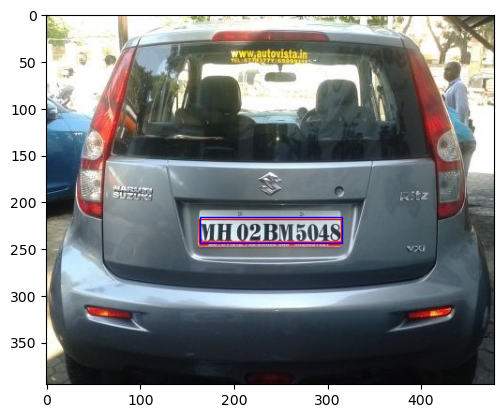

In [31]:
image = mpimg.imread(path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect1 = patches.Rectangle((cords[0], cords[1]), cords[2]-cords[0], cords[3]-cords[1], linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((cords2[0], cords2[1]), cords2[2]-cords2[0], cords2[3]-cords2[1], linewidth=1, edgecolor='b', facecolor='none')

# Add the patches to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

IOU function

In [32]:
def calculate_iou(boxa, boxb):
    """
    Calculate the Intersection over Union (IOU) between two bounding boxes.
    
    Args:
        box1 (tuple): (x1, y1, x2, y2) coordinates of the first bounding box.
        box2 (tuple): (x1, y1, x2, y2) coordinates of the second bounding box.
        
    Returns:
        float: Intersection over Union (IOU) value.
    """
    x1_min, y1_min, x1_max, y1_max = boxa
    x2_min, y2_min, x2_max, y2_max = boxb
    
    # Calculate the coordinates of the intersection rectangle
    x_inter_min = max(x1_min, x2_min)
    y_inter_min = max(y1_min, y2_min)
    x_inter_max = min(x1_max, x2_max)
    y_inter_max = min(y1_max, y2_max)
    
    # Calculate the area of the intersection
    inter_width = max(0, x_inter_max - x_inter_min + 1)
    inter_height = max(0, y_inter_max - y_inter_min + 1)
    intersection_area = inter_width * inter_height
    
    # Calculate the areas of the bounding boxes
    boxa_area = (x1_max - x1_min + 1) * (y1_max - y1_min + 1)
    boxb_area = (x2_max - x2_min + 1) * (y2_max - y2_min + 1)
    
    # Calculate the area of union
    union_area = boxa_area + boxb_area - intersection_area
    
    # Calculate and return IOU
    iou = intersection_area / union_area
    return iou

In [33]:
result = calculate_iou(cords, cords2)
print(result)

0.8883975059082422


In [59]:
def get_cords(results):
    cords = results[0].boxes[0].xyxy.tolist()
    x1, y1, x2, y2 = cords[0]
    return x1, y1, x2, y2

In [72]:
lista = []
no_results = 0
for i in joined_df.index:
    path = joined_df['filename'][i]
    results = model(path)
    if len(results[0]) != 0:
        cords = get_cords(results)
        cords2 = tuple(joined_df.loc[i, columns_to_extract])
        iou_result = calculate_iou(cords, cords2)
        lista.append(iou_result)
    else:
        no_results += 1
        lista.append(None)

image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\kaggle_dataset001\images\N1.jpeg: 640x640 1 license_plate, 46.8ms
Speed: 3.0ms preprocess, 46.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\kaggle_dataset001\images\N100.jpeg: 640x640 1 license_plate, 50.2ms
Speed: 4.0ms preprocess, 50.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\kaggle_dataset001\images\N101.jpeg: 640x640 1 license_plate, 52.2ms
Speed: 3.0ms preprocess, 52.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projekt Indywidualny\kaggle_dataset001\images\N102.jpeg: 640x640 1 license_plate, 53.3ms
Speed: 5.0ms preprocess, 53.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 C:\Users\macie\Desktop\Studia\Semestr 4\Projek

In [75]:
joined_df['yolo_iou'] = lista
joined_df.head(15)

,xmin,xmax,ymin,ymax,filename,iou,yolo_iou
0,1093.00,1396.00,645.00,727.00,kaggle_dataset001/images/N1.jpeg,0.947471,0.947471
1,134.00,301.00,312.00,350.00,kaggle_dataset001/images/N100.jpeg,0.960953,0.960953
2,31.00,139.00,128.00,161.00,kaggle_dataset001/images/N101.jpeg,0.957942,0.957942
3,164.00,316.00,216.00,243.00,kaggle_dataset001/images/N102.jpeg,0.888398,0.888398
4,813.00,1067.00,665.00,724.00,kaggle_dataset001/images/N103.jpeg,0.893898,0.893898
5,66.00,154.00,166.00,197.00,kaggle_dataset001/images/N104.jpeg,0.939231,0.939231
6,360.00,434.00,174.00,195.00,kaggle_dataset001/images/N105.jpeg,0.874424,0.874424
7,137.00,262.00,249.00,290.00,kaggle_dataset001/images/N106.jpeg,0.919099,0.919099
8,207.00,356.00,174.00,287.00,kaggle_dataset001/images/N107.jpeg,0.970660,0.970660
9,184.00,342.00,220.00,257.00,kaggle_dataset001/images/N108.jpeg,0.964332,0.964332


In [76]:
joined_df['yolo_iou'].describe()

count    86.000000
mean      0.796047
std       0.085060
min       0.608289
25%       0.728354
50%       0.782720
75%       0.853331
max       0.970660
Name: yolo_iou, dtype: float64

In [81]:
no_greats = (joined_df['yolo_iou'] > 0.9).sum()
print(no_greats)
no_decent = ((0.7 < joined_df['yolo_iou']) & (joined_df['yolo_iou'] < 0.9)).sum()
print(no_decent)
no_bad = (joined_df['yolo_iou'] < 0.7).sum()
print(no_bad)
no_nans = joined_df['yolo_iou'].isna().sum()
print(no_nans)

11
65
10
9


## InceptionRasNetV2

# Testing pytesseract

ModuleNotFoundError: No module named 'transformers'